# Esplorazione Stellare - L'analisi dell'universo (Fase preliminare)

In questa fase di esplorazione andremo a rispondere alle seguenti domande:

- Quante istanze e variabili ci sono?

- Quali sono le feature numeriche e categorighe?

- Ci sono valori mancanti?

I dati sono stati raccolti da SSDS (Sloan Digital Sky Survey) e contengono informazioni su stelle, galassie e quasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#tema
sns.set_theme(style="whitegrid")

#iniziamo a leggere il file csv
df = pd.read_csv('../data/star_classification.csv')

#visualizziamo le prime righe
df.head()



,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Quali sono i compiti delle varie librerie importate?

- pandas: manipolazione dei dati (lettura, visualizzazione e operazioni)

- numpy: operazioni numeriche e array

- matplotlib.pyplot: per creare grafici

- seaborn: visualizzazioni statistiche più elegantie e intuitive

---

## Informazioni di base sul dataset
Andiamo a:

- contare quante righe e colonne ci sono

- visualizzare i nomi delle colonne

- verificare i tipi di dati (numerici, categorici, ecc.)

- controllare se ci sono valori mancanti

Le informazioni di base sono fondamentali per le analisi più profonde successive

In [2]:
#dimensione del dataset
df.shape

#nomi delle colonne
df.columns

#tipi di dati e valori nulli
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),


Abbiamo il tipo di dato per ogni colonna (float64, int64, object)
Completa assenza di valori nulli. Come li avremmo gestiti?
- Eliminando le righe che presentevano valori null con df.dropna(). Utile se erano pochi i valori nulli
- Sostituendoli con la media (o mediana, moda) della colonna con df.fillna(df.mean())
- Sostituendoli con un valore fisso o categoria "sconosciuta". Utile per colonne categoriali (object). Avremmo usato ad esempio df[colonna].fillna("Unknown")


---

## Analisi della colonna Target

In questa parte analizziamo la variabile target, cioè quella che vogliamo predire. Vogliamo sapere:

- Qual è il nome della colonna target

- Quante classi ci sono

- Come sono distribuite le istanze tra le classi

- Se la distribuzione è bilanciata oppure no

Questo ci aiuterà a capire se, nel preprocessing, dovremo usare tecniche come SMOTE per riequilibrare i dati

In [3]:
#cerchiamo i valori unici della colonna target (class)
df['class'].unique()

#contiamo le istanze per ogni classe
df['class'].value_counts()

#percentuali per ogni classe
df['class'].value_counts(normalize=True)*100

class
GALAXY    59.445
STAR      21.594
QSO       18.961
Name: proportion, dtype: float64

Abbiamo notato che la classe GALAXY ha una proporzione di ben 59%, il che ci fa facilmente intuire che il dataset è sbilanciato.

Se lasciassimo il dataset così, molti modelli tenderebbero a preferire la classe maggioritaria.


---

## Distribuzione delle classi nel dataset

Ora visualizziamo un grafico a barre che mostra quante istanze ci sono per ciasuna classe (una tra GALAXY, STAR, QSO)
Questo ci aiuterà a capire visivamente lo sbilanciamento

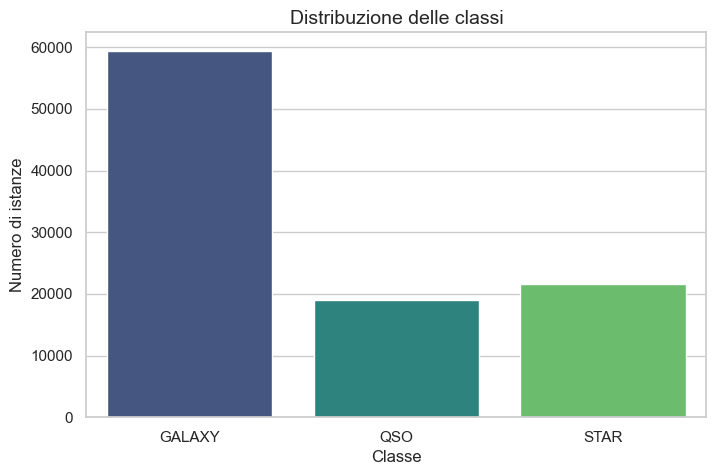

In [4]:
sns.set_style("whitegrid")

#conteggio istanze di ogni classe
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=df, palette='viridis', hue='class', legend=False) #aggiunti hue e legend per sintassi

plt.title('Distribuzione delle classi', fontsize=14)
plt.xlabel('Classe')
plt.ylabel('Numero di istanze')

plt.show()

## Statistiche descrittive delle feature numeriche

Analizziamo le statistiche principali di tutte le variabili numeriche del dataset. Questo ci aiuta a comprendere la distribuzione, la scala dei valori, la presenza di outlier e l'eventuale necessità di normalizzare in futuro

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Abbiamo:

- count: numero di valori non nulli per ogni colonna

- mean / std: media e deviazione standard, utili per capire la tendenza centrale e dispersione dei dati

- min / max

- percentili: indicano come sono distribuiti i dati

Ad esempio i valori minimi di u e g rappresentano dei valori errati che andranno gestiti


---

## Istogrammi e Boxplot delle feature numeriche

In questa sezione visualizziamo la distribuzione delle feature numeriche attraverso istogrammi e boxplot. Questo ci aiuta a:

- individuare outlier

- valutare la simmetria e la forma della distribuzione

- comprendere la variabilità interna di ciascuna variabile

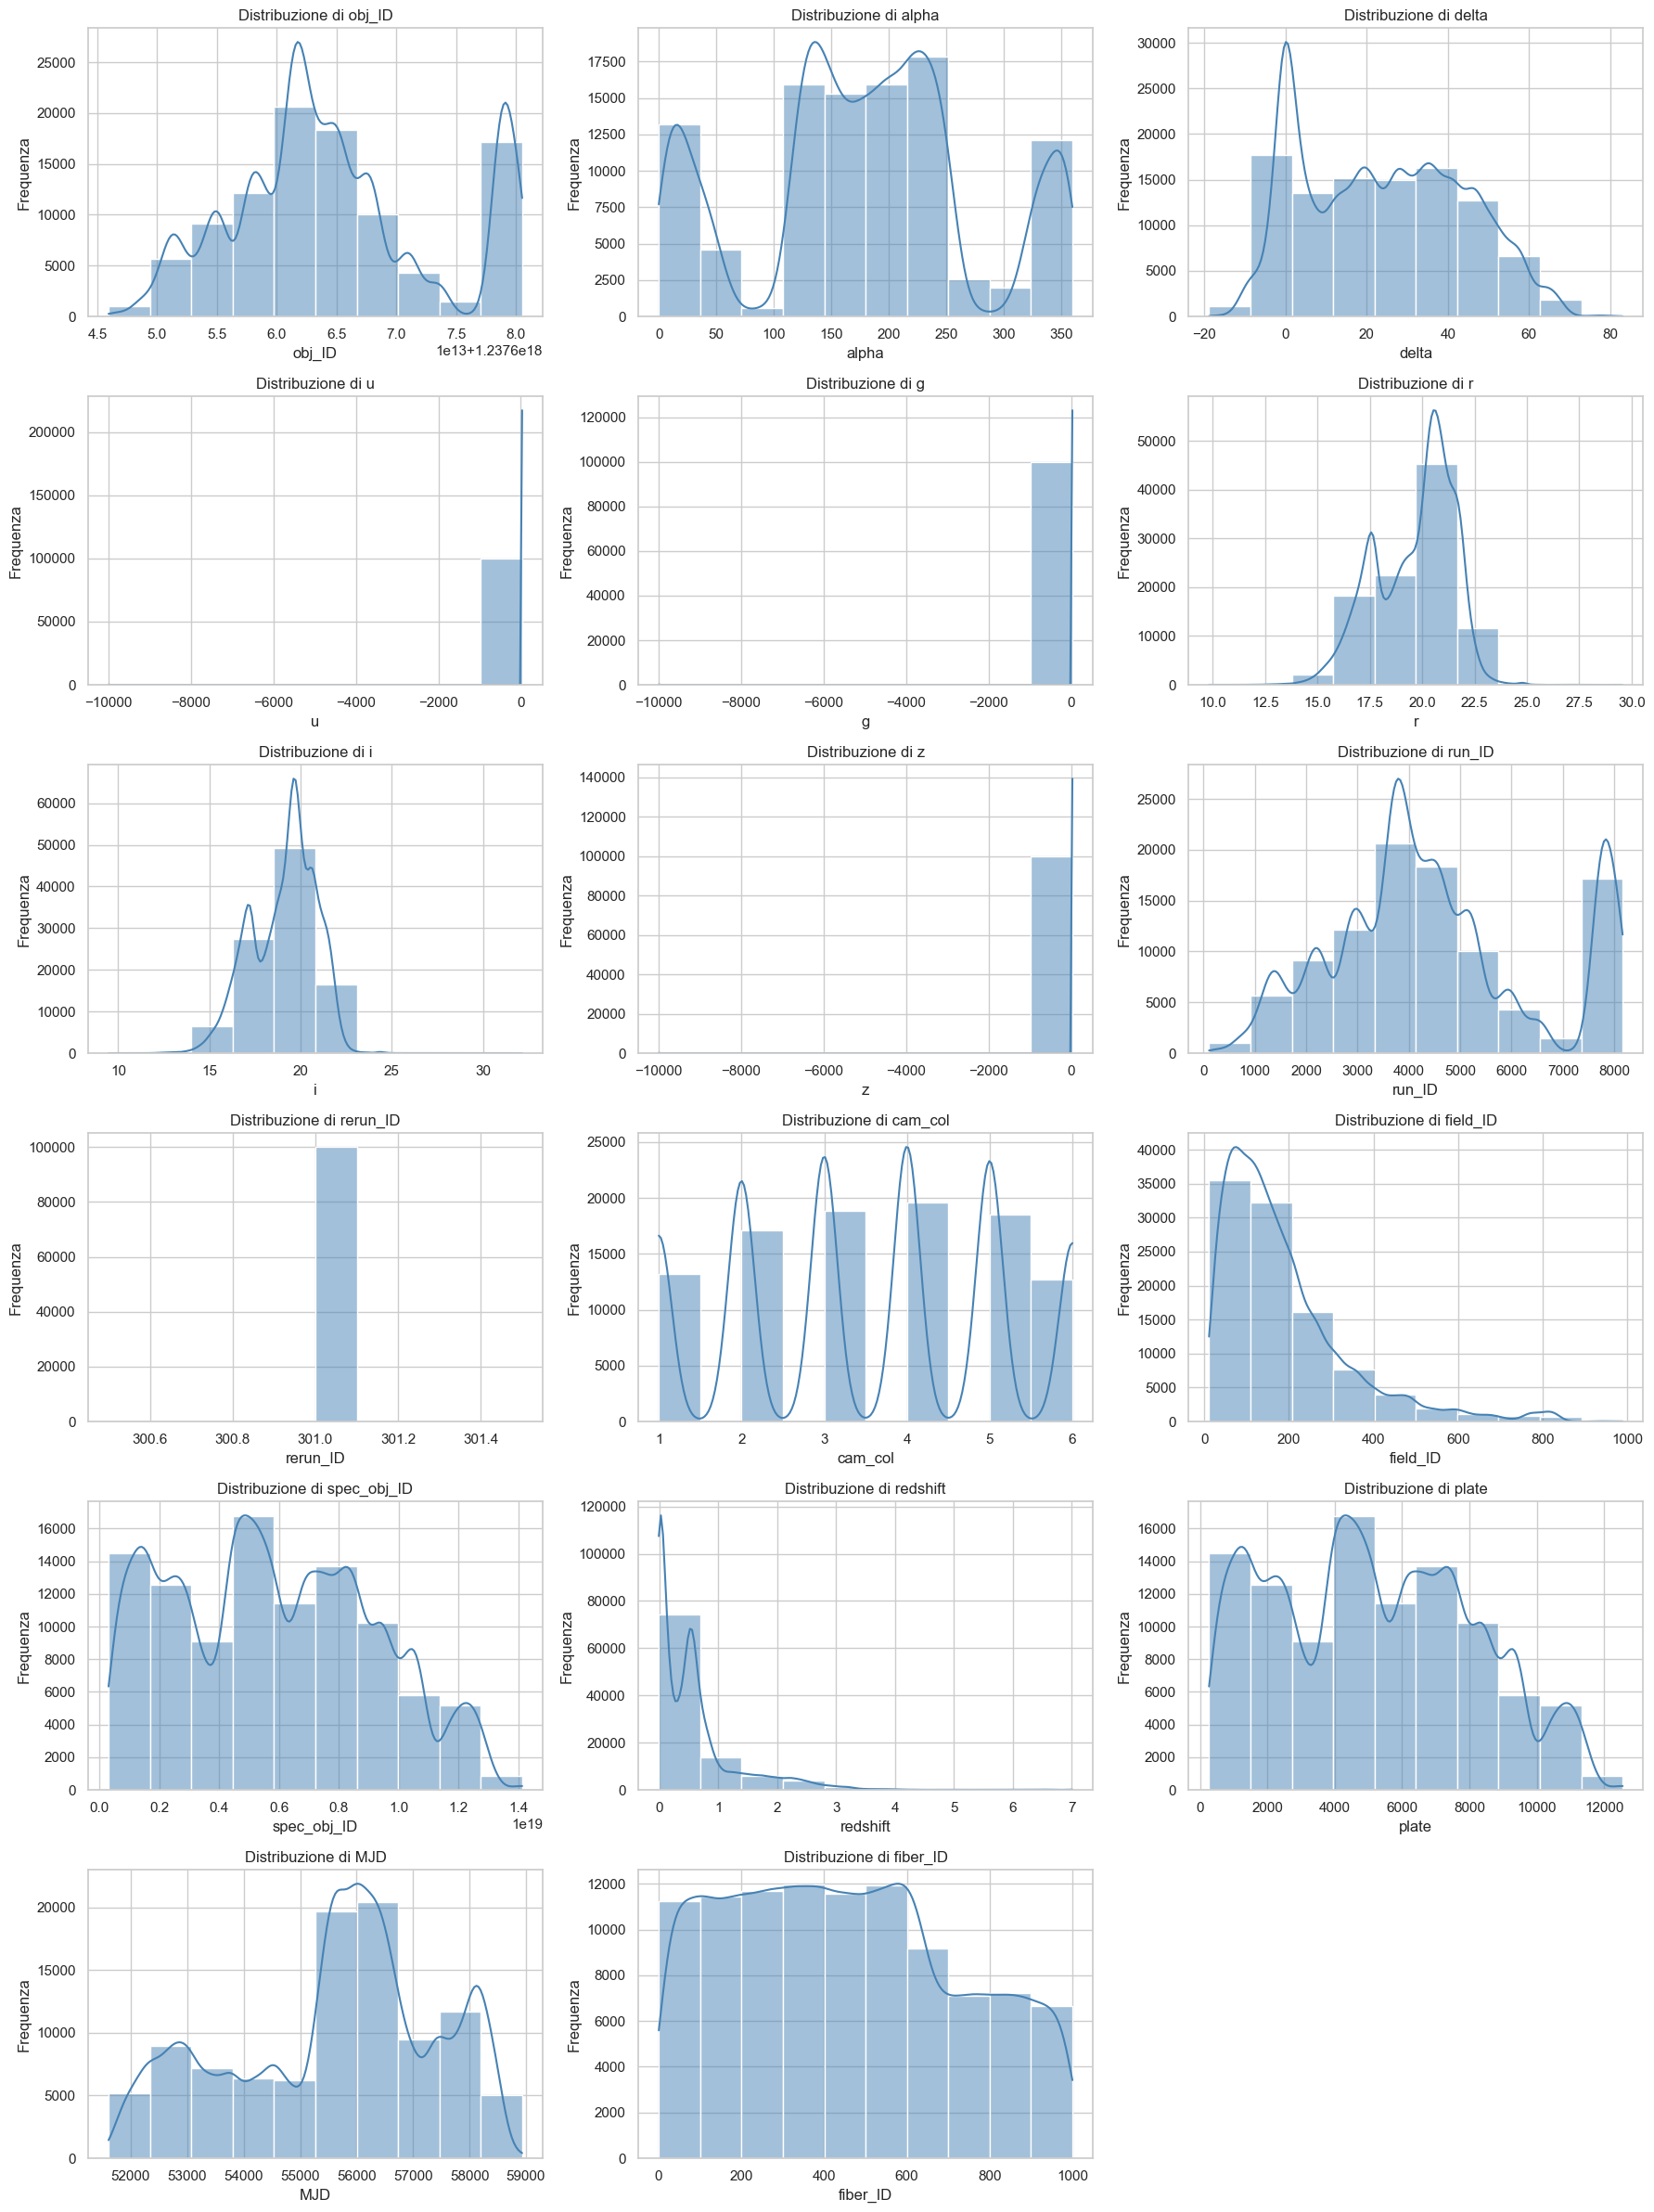

In [6]:
import math

#numero di feature numeriche
num_cols = df.select_dtypes(include='number').columns
n = len(num_cols)

cols=3
rows=math.ceil(n/cols)

plt.figure(figsize=(6*cols,4*rows))

#istogrammi
for i, col in enumerate(num_cols):
    plt.subplot(rows,cols,i+1)
    sns.histplot(df[col], kde=True, bins=10, color='steelblue')
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

Descriviamo una parte di queste distribuzioni

Variabili con anomalie evidenti:

- u, g, z: hanno un picco netto a sinistra con valori molto negativi. Questi non sono validi e andranno rimossi. Non vediamo valori come -9999 nella distribuzione perchè librerie come seaborn non fa visualizzare valori così estremi se sono poco presenti

Variabili con distribuzione regolare:

- r, i: mostrano una distribuzione con la maggior parte dei dati concentrati attorno alla media. Coerente con i valori di mean e std

Variabili categoriche o identificative:

- obj_ID, run_ID: mostrano una distribuzione quasi uniforme o multimodale (che presenta più di un picco o "moda")

Coordinate celesti:

- alpha, delta: distribuzioni estese e multimodali, coerenti con la copertura nello spazio. I valori minimi, massimi e quartili visti sopra ci danno indicazioni sull'intervallo di valori validi

---


## Matrice di correlazione

La matrice di correlazione ci aiuta a capire le relazioni tra le variabili numeriche del dataset.
Valori vicini a +1 o -1 indicano una forte correlazione (rispettivamente positiva o negativa), mentre valori vicini a 0 indicano assenza di correlazione.

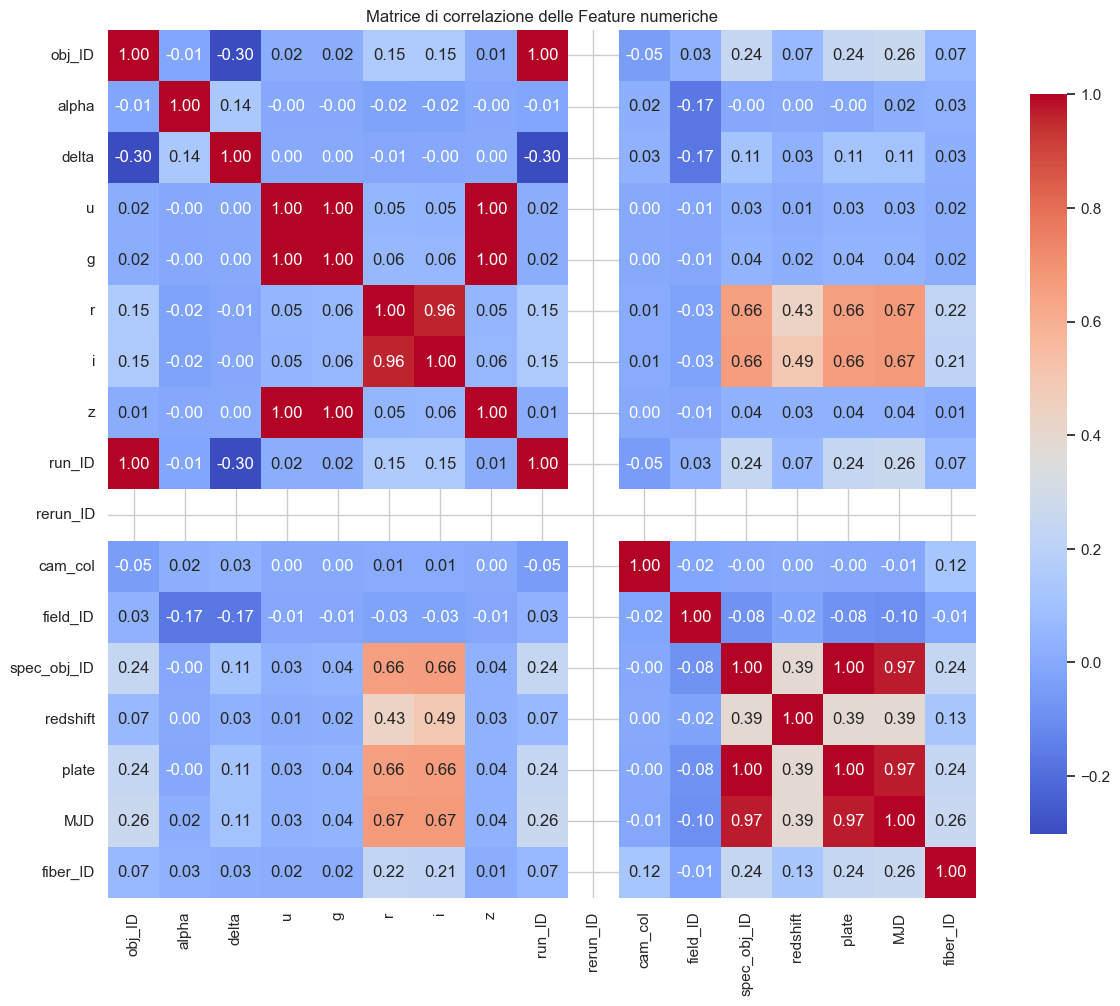

In [7]:
corr_matrix = df[num_cols].corr()

#heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice di correlazione delle Feature numeriche")
plt.show()

Significato di alcuni di questi attributi:

- alpha: ascensione retta (angolo), misura quanto a est un oggetto si trova rispetto al punto di riferimento

- delta: declinazione (angolo), misura quanto a nord o sud dell'equatore celeste si trova un oggetto (+90° polo nord, -90° polo sud)

- u: filtro Ultravioletto nel sistema fotometrico

- g: filtro Verde nel sistema fotometrico

- r: filtro Rosso nel sistema fotometrico

- i: filtro infrarosso Vicino nel sistema infometrico

- z: filtro infrarosso nel sistema fotometrico

- redshift: valore dello spostamento verso il rosso in base al cambiamento nella lunghezza d'onda

- MJD: Data Giuliana Modificata, usata per indicare quando è stato preso un dato pezzo di dati SDSS

---

# Preprocessing - Fase 1



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

#parametri
INPUT_PATH = 'star_classification.csv'
OUTPUT_PATH = 'data_sample_15k_2.csv'
TARGET_COL = 'class'
N_SAMPLES = 15000
RANDOM_STATE = 42

#mapping delle classi target
label_map = {
    'GALAXY': 0,
    'STAR': 1,
    'QSO': 2
}


def stratified_sample(df, target_col, n, random_state=42):
    """Restituisce un campione stratificato di n istanze dal dataframe."""
    df_sample, _ = train_test_split(
        df,
        train_size=n,
        stratify=df[target_col],
        random_state=random_state
    )
    return df_sample.reset_index(drop=True)

def clean_dataset(df):
    print(f"Valori nulli:\n{df.isnull().sum()}")
    print(f"Duplicati: {df.duplicated().sum()}")

    #rimuove duplicati
    df_clean = df.drop_duplicates().reset_index(drop=True)
    return df_clean

def encode_target(df, target_col):
    label_map = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
    df[target_col] = df[target_col].map(label_map)
    return df

def main():
    df = pd.read_csv('star_classification.csv')
    df_sampled = stratified_sample(df, TARGET_COL, N_SAMPLES)

    #pulizia
    df_cleaned = clean_dataset(df_sampled)

    #encoding della colonna target
    df_encoded = encode_target(df_cleaned, TARGET_COL)

    #salvataggio
    df_encoded.to_csv('data_sample_15k_2.csv', index=False)
    print(f"Campione pulito ed encodato salvato in: data_sample_15k_2.csv")


if __name__ == '__main__':
    main()



Valori nulli:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
Duplicati: 0
Campione pulito ed encodato salvato in: data_sample_15k_2.csv


Le fasi in questo codice sono:

- Campionamento: estrae 15000 righe preservando la distribuzione

- Pulizia: rimuove i duplicati e controlla valori nulli

- Encoding: converte GALAXY, STAR, QSO in 0,1,2

- Salvataggio

Abbiamo parametri iniziali con:

- file di input e output

- TARGET_COL: colonna target

- N_SAMPLES: quante righe vogliamo estrarre

- RANDOM_STATE: fissa la casualità, per ogni esecuzione

label_map si occupa della mappatura (fase di encoding)

stratified_sample estrae le n righe

clean_dataset:

- stampa quante celle mancanti ci sono per colonna

- stampa quanti duplicati ci sono

- rimuove i duplicati e restituisce un dataset pulito

encode_target applica la mappatura

---


# Preprocessing - Fase 2



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

INPUT_PATH = 'data_sample_15k_2.csv'
OUTPUT_PATH = 'data_ready_2.csv'
TARGET_COL = 'class'
RANDOM_STATE = 42

def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def apply_smote(X, y):
    smote = SMOTE(random_state=RANDOM_STATE)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

def main():
    df = pd.read_csv(INPUT_PATH)

    #separazione X e y
    X = df.drop(columns=[TARGET_COL])
    y = df[TARGET_COL]

    #scaling (evitiamo di scalare ID o colonne categoriche inutili)
    cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns
    X_scaled = pd.DataFrame(scale_features(X[cols_to_scale]), columns=cols_to_scale)

    #applichiamo SMOTE
    X_resampled, y_resampled = apply_smote(X_scaled, y)

    #unione in un unico DataFrame
    df_ready = pd.DataFrame(X_resampled, columns=X_scaled.columns)
    df_ready[TARGET_COL] = y_resampled

    #salvataggio
    df_ready.to_csv(OUTPUT_PATH, index=False)
    print(f"Dataset bilanciato e scalato salvato in: {OUTPUT_PATH}")

if __name__ == '__main__':
    main()


Dataset bilanciato e scalato salvato in: data_ready_2.csv


Come input abbiamo l'output della prima fase. Come output abbiamo il dataset su cui andremo a lavorare con gli algoritmi successivamente

scale_features:

- usa StandardScaler per standardizzare le feature numeriche (Z-score)

- fondamentale per modelli che dipendono dalle scale come SVM, KNN, reti neurali

apply_smote:

- applica SMOTE (Synthetic Minority Oversampling Technique) per bilanciare le classi

- crea nuovi esempi sintetici per le classi minoritarie, così che tutte abbiano lo stesso numero di istanze

- si fa prima lo scaling proprio perchè funziona solo su dati numerici

---

# Classificazione stellare - Modelli Base

In questa fase verranno addestrati e valutati cinque classificatori base sul dataset preparato in precedenza

Il file contiene solo feature numeriche e una colonna target ('class')

Prima di addestrare i classificatori, i dati vengono suddivisi in due insiemi:

- training set (70%): usato proprio per l'addestramento dei modelli

- test set (restante 30%): usato per andare a valutare i modelli su dati che non ha visto durante il training




In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

#caricamento del dataset apparecchiato
df = pd.read_csv('data_ready_2.csv')

#separazione feature e target
X = df.drop('class', axis=1)
y = df['class']

#training-test split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


## Primo modello: Decision Tree Classifier

Costruisce un albero decisionale in cui ogni nodo corrisponde a una condizione su una feature

I vantaggi sono:

- facile da interpretare per alberi non molti grandi

- basso costo O(profondità)

- velocità elevata nel classificare i record

- robusto rispetto al rumore (soprattutto se si evita l'overfitting)

- gestisce facilmente attributi ridondanti o irrilevanti

Mentre gli svantaggi:

- lo spazio che occupa può crescere esponenzialmente

-  non considera l'interazione tra gli attributi

- ogni divisione si basa su una singola caratteristica


In [11]:
#inizializzazione e training del modello
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

#valutazione
y_pred = tree_clf.predict(X_test)

print("\nDECISION TREE CLASSIFIER")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#salvataggio modello
joblib.dump(tree_clf, 'models/tree_model.pkl') #salviamo gli output nella subdir models


DECISION TREE CLASSIFIER
Accuracy: 0.9717169200099676
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2675
           1       1.00      1.00      1.00      2675
           2       0.96      0.96      0.96      2676

    accuracy                           0.97      8026
   macro avg       0.97      0.97      0.97      8026
weighted avg       0.97      0.97      0.97      8026

Confusion Matrix:
[[2556    5  114]
 [   6 2669    0]
 [ 101    1 2574]]


['models/tree_model.pkl']

Accuracy: percentuale di predizioni corrette sul totale delle istanze

Classification Report:

- precision: tra tutte le istanze classificate come appartenenti a una certa classe, quante lo sono davvero

- recall: tra tutte le istanze che realmente appartengono a una certa classe, quante il modello ne ha riconosciute

- f1-score: media armonica tra precision e recall

- support: numero reale di istanze di ciascuna classe nel test set

- aggregato macro avg: media semplice tra le classi (tratta tutte le classi allo stesso modo)

- aggregato weighted avg: media pesata per il numero di esempi per ciascuna classe

Confusion Matrix:

- matrice 3x3 perchè abbiamo tre classi, che mostra come le istanze vere (righe) vengono classificate (colonne)

- ogni cella indica quante volte una classe vera è stata predetta come un'altra

- prima riga: 2556 GALAXY correttamente classificate, 5 scambiate per STAR, 114 scambiate per QSO

- seconda riga: 6 scambiate per GALAXY, 2669 STAR correttamente classificate, nessuna scambiata per QSO

- terza riga: 101 scambiate per GALAXY, 1 scambiata per STAR, 2574 QSO classificate correttamente

## Secondo modello: K-Nearest Neighbors (KNN)

Classifica un'istanza osservando le 'k' istanze più vicine nel dataset (nel nostro caso 5)

I vantaggi sono:

- non richiede la costruzione di un modello

- permettono di costruire contorni delle classi non lineari, ciò li rende più flessibili

Mentre gli svantaggi:

- richiedono una misura di distanza per calcolare la vicinanza

- richiedono una fase di pre-processing per la normalizzazione

- la classe è determinata localmente, quindi suscettibile al rumore dei dati

- molto sensibili alla presenza di attributi irrilevanti o correlati che falseranno le distanze tra record

- il costo di classificazione può essere molto alto e, in caso di mancanza di indici, dipende linearmente dalla dimensione del training set 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

print("\nK-NEAREST NEIGHBORS CLASSIFIER")

#istanzia e allena il KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

#predizioni
y_pred_knn = knn_clf.predict(X_test)

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

#confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

#salva il modello KNN
joblib.dump(knn_clf, 'models/knn_model.pkl')



K-NEAREST NEIGHBORS CLASSIFIER
Accuracy: 0.923000249190132
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2675
           1       0.91      0.94      0.93      2675
           2       0.96      0.95      0.95      2676

    accuracy                           0.92      8026
   macro avg       0.92      0.92      0.92      8026
weighted avg       0.92      0.92      0.92      8026

Confusion Matrix:
[[2359  211  105]
 [ 143 2519   13]
 [ 108   38 2530]]


['models/knn_model.pkl']

## Terzo modello: Support Vector Machine (SVM)

Trova l'iperpiano ottimale che separa le classi massimizzando il margine

I vantaggi sono:

- robusto per il rumore

Mentre gli svantaggi sono:

- difficoltà nel gestire valori mancanti

- elevata complessità computazionale

Come gestire l'overfitting? Massimizzando il margine


In [13]:
from sklearn.svm import SVC

print("\nSUPPORT VECTOR MACHINE (SVM)")

#istanzia e allena SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

#predizioni
y_pred_svm = svm_clf.predict(X_test)

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

#salva il modello
joblib.dump(svm_clf, 'models/svm_model.pkl')


SUPPORT VECTOR MACHINE (SVM)
Accuracy: 0.9626214801893845
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2675
           1       0.97      0.99      0.98      2675
           2       0.99      0.94      0.96      2676

    accuracy                           0.96      8026
   macro avg       0.96      0.96      0.96      8026
weighted avg       0.96      0.96      0.96      8026

Confusion Matrix:
[[2554   83   38]
 [  27 2648    0]
 [ 147    5 2524]]


['models/svm_model.pkl']

## Quarto modello: Naive Bayes

Basato sul teorema di Bayes, assume l'indipendenza tra le feature

Vantaggi:

- robusto rispetto al rumore (punti isolati): si basa sulle frequenze (o distribuzioni)

- gestisce i valori mancanti ignorando l'istanza durante i calcolci delle stime di probabilità

- robusto rispetto agli attributi irrilevanti: il valore di quell'attributo non darà molta più informazione su una classe rispetto a un'altra

Svantaggi:

- l'assunzione di dipendenza potrebbe non essere valida per alcuni attributi: si usano tecniche alternative come Bayesian Belief Network


In [14]:
from sklearn.naive_bayes import GaussianNB

print("\nNAIVE BAYES CLASSIFIER")

#istanzia e allena Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

#predizioni
y_pred_nb = nb_clf.predict(X_test)

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

#confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

#salva il modello
joblib.dump(nb_clf, 'models/naive_bayes_model.pkl')



NAIVE BAYES CLASSIFIER
Accuracy: 0.8943433840019935
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2675
           1       0.99      0.97      0.98      2675
           2       0.81      0.90      0.86      2676

    accuracy                           0.89      8026
   macro avg       0.90      0.89      0.89      8026
weighted avg       0.90      0.89      0.89      8026

Confusion Matrix:
[[2158   16  501]
 [  13 2600   62]
 [ 255    1 2420]]


['models/naive_bayes_model.pkl']

## Quinto ed ultimo modello base: Rete Neurale (MPLClassifier)

Una rete neurale artificiale con un solo strato nascosto da 50 neuroni

Ottimizza pesi con la tecnica della backpropagation

Caratteristiche delle ANN:

- ANN a più strati sono approssimatori universali ma potrebbero presentare il problema dell'overfitting se la rete è troppo complessa

- la discesa del gradiente può convergere al minimo locale

- la costruzione del modello può richiedere molto tempo, ma il test può essere molto veloce

- può gestire attributi ridondanti perchè i pesi vengono appresi automaticamente

- sensibile al rumore nei dati del training set

- difficoltà a gestire attributi mancanti

In [15]:
from sklearn.neural_network import MLPClassifier

print("\nRETE NEURALE")

#una sola hidden layer con 50 neuroni
#500: numero massimo di iterazioni per la convergenza
#42: per riproducibilità
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

#salvataggio modello
joblib.dump(mlp_clf, 'models/mlp_model.pkl')



RETE NEURALE
Accuracy: 0.9755793670570645
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2675
           1       0.99      1.00      0.99      2675
           2       0.98      0.96      0.97      2676

    accuracy                           0.98      8026
   macro avg       0.98      0.98      0.98      8026
weighted avg       0.98      0.98      0.98      8026

Confusion Matrix:
 [[2589   36   50]
 [   3 2672    0]
 [ 106    1 2569]]


['models/mlp_model.pkl']

---

# Classificazione Stellare - Modelli Ensemble

Come per i modelli base:

- statify=y assicura che la distribuzione tra le tre classi sia preservata sia nel training set che nel test set

Per ogni modello (come nei classifatori base):

- istanziazione del modello

- addestramento sul training set con fit

- predizione sul test set con predict

- valutazione tramite accuracy, classification report e confusion matrix

- salvataggio con joblib

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

df = pd.read_csv('data_ready_2.csv')
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Primo Modello - Random Forest Classifier

È un ensemble che costruisce molti decision tree (nel nostro caso 100) addestrati su bootstrap samples

Ogni albero usa un sottoinsieme casuale di feature ad ogni split per ridurne la correlazione

Le predizioni finali sono ottenute con un voto di maggioranza tra gli alberi

Pro:

- riduce di molto la varianza rispetto ai singoli alberi, prevenendo l'overfitting

- può stimare l'importanza delle feature, per capire quali sono più rilevanti

Contro:

- più lento ad addestrare e meno interpretabile rispetto agli alberi


In [17]:
print("\nRANDOM FOREST CLASSIFIER")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#salvataggio
joblib.dump(rf_clf, 'models/random_forest_model.pkl')


RANDOM FOREST CLASSIFIER
Accuracy: 0.9807512614464586
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1783
           1       0.99      1.00      1.00      1784
           2       0.98      0.97      0.97      1784

    accuracy                           0.98      5351
   macro avg       0.98      0.98      0.98      5351
weighted avg       0.98      0.98      0.98      5351

Confusion Matrix:
 [[1741   10   32]
 [   0 1784    0]
 [  60    1 1723]]


['models/random_forest_model.pkl']

## Secondo Modello: Bagging Classifier

Generalizzazione del bagging: combina più modelli (nel nostro caso decision tree) addestrati su bootstrap samples, predisposti in parallelo

Le predizioni sono aggregate con un voto di maggioranza semplice

Pro:

- riduce la varianza, rendendolo più stabile rispetto a un singolo albero

- semplice da capire e implementare

Contro:

- se i modelli base sono altamente correlati, il guadagno può essere limitato



In [18]:
print("\nBAGGING CLASSIFIER")
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#salvataggio
joblib.dump(bagging_clf, 'models/bagging_model.pkl')


BAGGING CLASSIFIER
Accuracy: 0.9794430947486451
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1783
           1       1.00      1.00      1.00      1784
           2       0.98      0.96      0.97      1784

    accuracy                           0.98      5351
   macro avg       0.98      0.98      0.98      5351
weighted avg       0.98      0.98      0.98      5351

Confusion Matrix:
 [[1739    2   42]
 [   1 1783    0]
 [  64    1 1719]]


['models/bagging_model.pkl']

## Terzo e ultimo Modello: AdaBoost Classifier

Algoritmo di boosting sequenziale, che costruisce una serie di "weak learners" (modelli che lavorano meglio rispetto a scegliere in modo casuale i punti)

Ogni iterazione:

- assegna peso maggiore agli esempi erroneamente classificati dai classificatori precedenti

- genera un nuovo classificatore più classificato sugli errori residui

Le previsioni finali sono una combinazione pesata dei classificatori

Pro:

- spesso raggiunge alta accuratezza con meno modelli

Contro:

- più suscettibile al rumore nei dati e può sovraddestrare se troppo lungo

- l'ordine sequenziale richiede maggiore attenzione all'overfitting, perchè possono propagare errori se non ben regolati



In [19]:
print("\nADABOOST CLASSIFIER")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

boosting_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
boosting_clf.fit(X_train, y_train)
y_pred = boosting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

joblib.dump(boosting_clf, 'models/boosting_model.pkl')


ADABOOST CLASSIFIER
Accuracy: 0.9284245935339189
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1783
           1       0.99      1.00      1.00      1784
           2       0.98      0.81      0.89      1784

    accuracy                           0.93      5351
   macro avg       0.94      0.93      0.93      5351
weighted avg       0.94      0.93      0.93      5351

Confusion Matrix:
 [[1746   11   26]
 [   0 1784    0]
 [ 345    1 1438]]


['models/boosting_model.pkl']

---

# Ultimo Step: Confronto dei vari modelli

Con questo codice andremo a:

- caricare tutti i modelli salvati

- prepeare i dati di testing, applicando scaling solo ai modelli che ne hanno bisogno

- calcolare accuracy e F1-score per ogni modello

- mostare i risultati in tabella e con un grafo a barre orizzontali


📊 Confronto dei Modelli:

                 Model  Accuracy  F1-macro
         Random Forest  0.987167  0.987158
               Bagging  0.986295  0.986293
         Decision Tree  0.971717  0.971717
  Neural Network (MLP)  0.957887  0.957807
Support Vector Machine  0.948542  0.948651
              AdaBoost  0.927610  0.927011
   K-Nearest Neighbors  0.916148  0.916508
           Naive Bayes  0.894343  0.894666


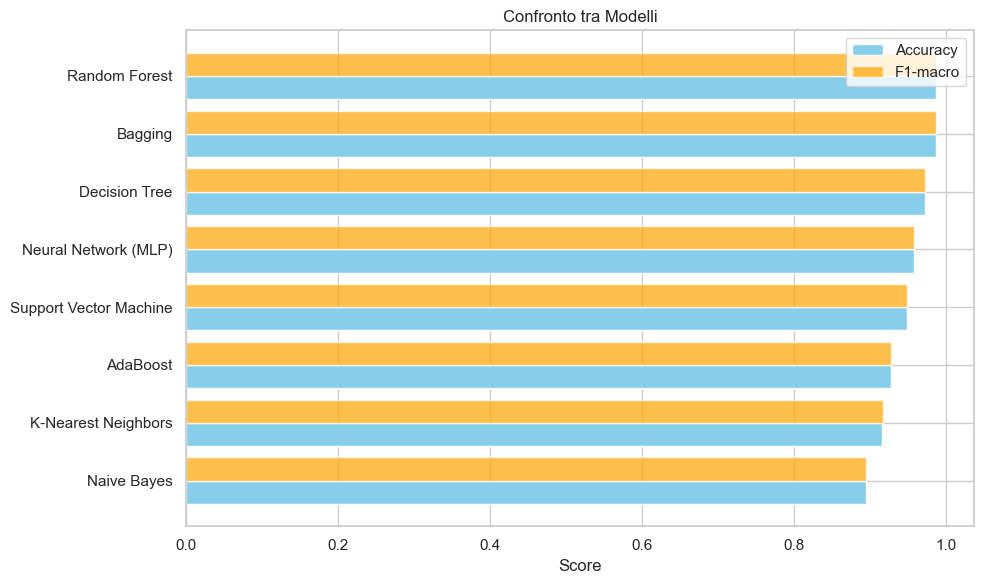

In [22]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score

#percorso ai modelli salvati
MODEL_PATH = "models"
MODEL_NAMES = [
    ("Decision Tree", "tree_model.pkl"),
    ("K-Nearest Neighbors", "knn_model.pkl"),
    ("Support Vector Machine", "svm_model.pkl"),
    ("Naive Bayes", "naive_bayes_model.pkl"),
    ("Neural Network (MLP)", "mlp_model.pkl"),
    ("Random Forest", "random_forest_model.pkl"),
    ("Bagging", "bagging_model.pkl"),
    ("AdaBoost", "boosting_model.pkl")
]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

DATA_PATH = "data_ready_2.csv"
df = pd.read_csv(DATA_PATH)
X = df.drop("class", axis=1)
y = df["class"]

#divisione test set coerente con quella usata durante il training
_, X_test, _, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#scaling (necessario per MLP, SVM, KNN)
scaler = StandardScaler()
X_test_scaled = scaler.fit(X).transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


results = []

for name, filename in MODEL_NAMES:
    model = joblib.load(os.path.join(MODEL_PATH, filename))

    #scaling solo per i modelli che lo richiedono
    if name in ["K-Nearest Neighbors", "Support Vector Machine", "Neural Network (MLP)"]:
        X_input = X_test_scaled
    else:
        X_input = X_test

    y_pred = model.predict(X_input)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-macro": f1
    })

#creazione dataframe risultati
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df = results_df.reset_index(drop=True)
print("\n📊 Confronto dei Modelli:\n")
print(results_df.to_string(index=False))

bar_width = 0.4
indices = np.arange(len(results_df))

#bar plot
plt.figure(figsize=(10, 6))
plt.barh(indices + bar_width/2, results_df["Accuracy"], height=bar_width, color="skyblue", label="Accuracy")
plt.barh(indices - bar_width/2, results_df["F1-macro"], height=bar_width, color="orange", alpha=0.7, label="F1-macro")
plt.yticks(indices, results_df["Model"])
plt.xlabel("Score")
plt.title("Confronto tra Modelli")
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


## Analisi finale interstellar(e)

### I modelli ad albero: forti e affidabili

Il Decision Tree già da solo riesce a fare un ottimo lavoro, perchè crea regole semplici ma molto mirate. Tuttavia, tende facilmente a sovradattarsi ai dati. È qui che entrano in gioco i modelli Ensemble:

- Bagging: migliora la situazione combinando tanti alberi su dati diversi -> riduce l'overfitting

- Random Forest va ancora meglio: oltre a cambiare i dati, cambia anche le feature usate in ogni albero -> questo lo rende più stabile e preciso

Questi ultimi due, infatti, riescono a cogliere bene le relazioni tra le variabili numeriche del dataset senza esagerare con la complessità

### AdaBoost: buono, ma meno adatto in questo contesto

AdaBoost crea modelli deboli (di solito alberi molto semplici) e li migliroa passo dopo passo. Questo approccio funziona bene con dati semplici o rumorosi, ma nel nostro caso i dati erano troppo complessi per quel tipo di alberi.

Abbiamo performance sotto agli altri ensemble

### SVM e KNN: discreto lavoro

- SVM è buon classificatore, specie se i dati sono ben separabili. Si è comportato bene nel nostro contesto

- KNN, invece, è più sensibile allo scaling e alla quantità di dati: funziona, ma meno stabilmente

In entrambi i casi, servono molti accorgimenti nel preprocessing per ottenere buoni risultati, e sono più lenti o meno efficienti nella predizione

### Reti neurali e probabilità

- MLP, la nostra rete neurale, si è comportata piuttosto bene: ha colto relazioni complesse, ma richiede molto lavoro per essere regolata bene (numero di layer, epoche, ecc.)

- Naive Bayes, invece, è partito svantaggiato: assume che le feature siano indipendenti tra loro, cosa che nel nostro dataset non è affatto vera. Questo ha penalizzato molto il classificatore probabilistico

---

***Un Saluto dai vostri: Cooper and Mark Watney***
Attadia Andrea
Vito Simone Goffredo

